## Finding Heavy Traffic Indicators on I-94

### About 
Analyze a dataset about westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).

### Goal
The goal of our analysis is to determine indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

### Dataset description

1. Data Set Information:
Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume.

2. Attribute Information:
- holiday Categorical US National holidays plus regional holiday, Minnesota State Fair
- `temp` Numeric Average temp in kelvin
- `rain_1h` Numeric Amount in mm of rain that occurred in the hour
- `snow_1h` Numeric Amount in mm of snow that occurred in the hour
- `clouds_all` Numeric Percentage of cloud cover
- `weather_main` Categorical Short textual description of the current weather
- `weather_description` Categorical Longer textual description of the current weather
- `date_time` DateTime Hour of the data collected in local CST time

In [1]:
import pandas as pd
data=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [2]:
# Check if any null values
data.isnull().any()

holiday                False
temp                   False
rain_1h                False
snow_1h                False
clouds_all             False
weather_main           False
weather_description    False
date_time              False
traffic_volume         False
dtype: bool

### 2. Analyzing Traffic Volume
In the next exercise, we're going to plot a histogram to visualize the distribution of the `traffic_volume` column.
1. Add the `%matplotlib inline` magic.
2. Plot a histogram to examine the distribution of the `traffic_volume` column. Use a Pandas method.
3. Use `Series.describe()` to look up a few statistics about the `traffic_volume` column.
4. Note a few observations about the distribution of `traffic_volume` based on the histogram and the result of `Series.describe()`.
5. Do you think daytime and nighttime influence the traffic volume?

Text(0.5, 0, 'Traffic volume')

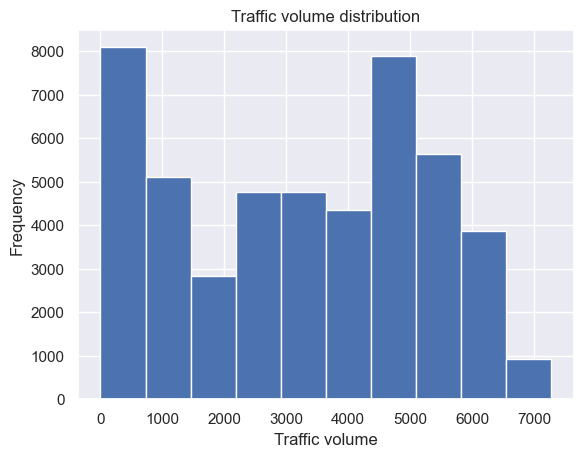

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_theme()
data['traffic_volume'].plot.hist()
plt.title('Traffic volume distribution')
plt.xlabel('Traffic volume')

- About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
- About 75% of the time, the traffic volume was four times as much (4,933 cars or more).

### 3. Traffic Volume: Day vs. Night
We'll start by dividing the dataset into two parts:
- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

1. Transform the `date_time` column to datetime by using the function `pd.to_datetime()`.
2. Use the `Series.dt.hour` property to get the hour of every instance of the `date_time` column and do the following:
   - Isolate the daytime data.
   - Isolate the nighttime data.

In [4]:
data['date_time']=pd.to_datetime(data['date_time'])
daytime=data.copy()[(data['date_time'].dt.hour>=7) & (data['date_time'].dt.hour<19)]
nighttime=data.copy()[(data['date_time'].dt.hour<7) | (data['date_time'].dt.hour>=19)]
print(nighttime.shape)
print(daytime.shape)

(24327, 9)
(23877, 9)


### 4. Traffic Volume: Day vs. Night (II)
Compare the traffic volume at night and during day.
1. Plot the histograms of `traffic_volume` for both day and night. Organize the two histograms side-by-side on a grid chart.
2. For both histograms, do the following:
   - Add a title.
   - Add x- and y-labels.
   - Bring the x- and the y-axis to the same ranges (this will help you compare the histograms correctly).
3. Use `Series.describe()` to look up a few statistics for `traffic_volume` for both day and night.
4. Analyze the results:
   - What shape do the histograms have and what does that indicate?
   - If the traffic is light at night, and our goal is to find indicators of heavy traffic, should we still be using the nighttime data?

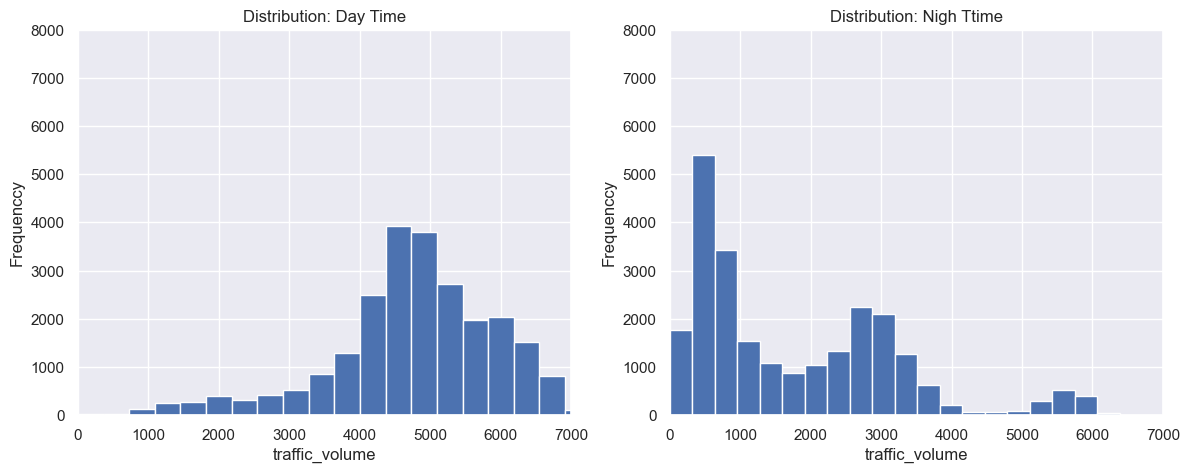

In [5]:
# Set grid figure size
plt.figure(figsize=(14,5))
sns.set_theme()

# Set daytime
plt.subplot(1,2,1)
plt.hist(daytime['traffic_volume'],bins=20)
plt.title('Distribution: Day Time')
plt.xlabel('traffic_volume')
plt.ylabel('Frequenccy')
plt.xlim([0,7000])
plt.ylim([0,8000])

# Set nighttime
plt.subplot(1,2,2)
plt.hist(nighttime['traffic_volume'],bins=20)
plt.title('Distribution: Nigh Ttime')
plt.xlabel('traffic_volume')
plt.ylabel('Frequenccy')
plt.xlim([0,7000])
plt.ylim([0,8000])

plt.show()

In [6]:
print(daytime['traffic_volume'].describe())
print('Median: ',daytime['traffic_volume'].median())
print('Mode: ',daytime['traffic_volume'].mode())

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64
Median:  4820.0
Mode:  0    5104
Name: traffic_volume, dtype: int64


In [7]:
print(nighttime['traffic_volume'].describe())
print('Median: ',nighttime['traffic_volume'].median())
print('Mode: ',nighttime['traffic_volume'].mode())

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64
Median:  1287.0
Mode:  0    353
1    356
Name: traffic_volume, dtype: int64


- Day time traffic distribution is left-skewed, refer to traffic volume in most of time is high (4000~7000). 75% time traffic volume is at least 4252. Mean is 4762 and median is 4860.  
- Night time traffic distribution is right-skew, refer to most of time traffic volume is rather lower than 1000. 75% time traffic volume is only 2819. Mean is 1785 and median is 1287.
- Since our goal is to find indicators of heavy traffic, the traffic at night is relative light and have only little impact to heavy traffic. We can exclude night time data in the future analytics.

### 5. Time Indicators
1. Generate a line plot to visualize how the traffic volume changed each month on average.
2. Analyze the line plot. Do you notice any interesting exception?

In [8]:
# Create month columns for grouping
data['month']=data['date_time'].dt.month

# Create by_month to aggregate mean for each column 
by_month=data.groupby('month').mean()
by_month['traffic_volume']

month
1     3051.081378
2     3197.945547
3     3308.388611
4     3304.372388
5     3366.319432
6     3419.077413
7     3205.481752
8     3394.241891
9     3303.049334
10    3390.678376
11    3167.592784
12    3024.257943
Name: traffic_volume, dtype: float64

Text(0, 0.5, 'traffic_volume')

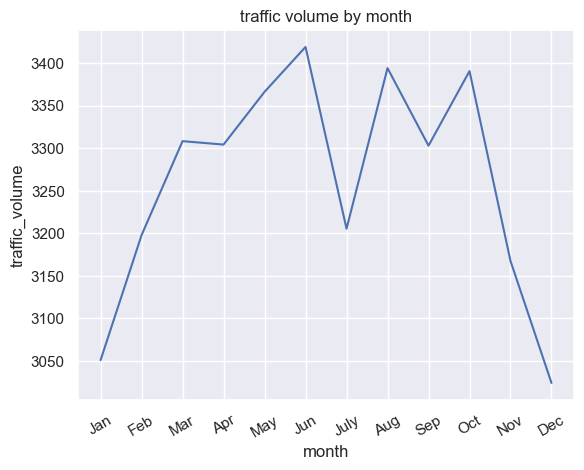

In [13]:
# Plot a line graph to show relation between traffic and month
by_month['traffic_volume'].plot.line()
plt.title('traffic volume by month')
plt.xticks(rotation=30, 
    ticks=[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,], 
    labels=["Jan",  "Feb",  "Mar",  "Apr",  "May",  "Jun",  "July",  "Aug",  "Sep","Oct", "Nov", "Dec"] 
)
plt.ylabel('traffic_volume')

- In hot season, traffic tend to be higher (Mar - Ocr).
- Respectively, in cold season, traffic tend to be lower (Nov - Feb).
- Therefore, an exception occured on July. The traffic volume dropped rapidly on July. It raised a question if there any special factor we don't know aboyt July. It's an individual event or repeatly ecery year?
- To further deicover the effect, we need verify data how the traffic volume changed each year.

### 6. Time Indicators (II)
1. Generate a line plot to visualize how the traffic volume changed each day of the week on average.
2. Analyze the line plot. Do you notice any difference between business days and the weekend?

In [15]:
daytime['dayofweek']=daytime['date_time'].dt.dayofweek
by_dayofweek=daytime.groupby('dayofweek').mean()


Text(0.5, 1.0, 'traffic volume by day of week')

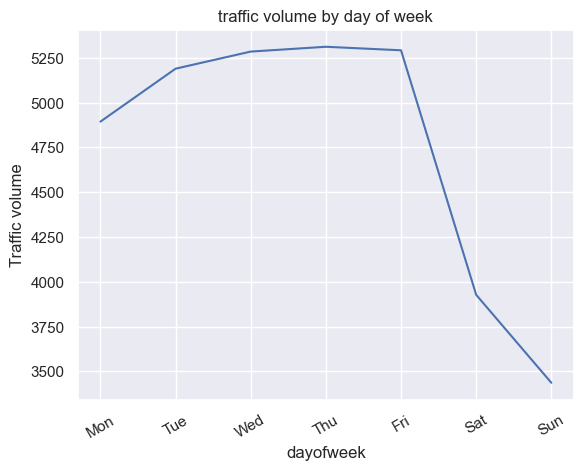

In [16]:
by_dayofweek['traffic_volume'].plot.line()
plt.ylabel('Traffic volume')
plt.xticks(rotation=30, ticks=[0, 1, 2, 3, 4, 5, 6,], labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.title('traffic volume by day of week')

- Traffic volume at weekend is significantly lower than weekdays

### 7. Time Indicators (III)
1. Plot two line plots on a grid chart to visualize how the traffic volume changes by time of the day.
   - One plot shows how traffic volume changes during business days and the other shows how it changes during weekends.
   - Add a title to each graph.
   - Bring both graphs to the same x- and y-axis range.
2. Analyze both charts. How do they compare? When are the rush hours on business days?
3. Summarize all your findings regarding time indicators for heavy traffic.

In [24]:
daytime['hour']=daytime['date_time'].dt.hour
by_hour=daytime.groupby('hour').mean()
business_days=daytime[daytime['dayofweek']<5]
weekend=daytime[daytime['dayofweek']>=5]
# business day = [0,1,2,3,4]
# weekend = [5,6]

In [27]:
by_hour_business=business_days.groupby('hour').mean()
by_hour_weekend=weekend.groupby('hour').mean()
# Aggreate mean of traffic volume by hour for two dataset - business days and weekend

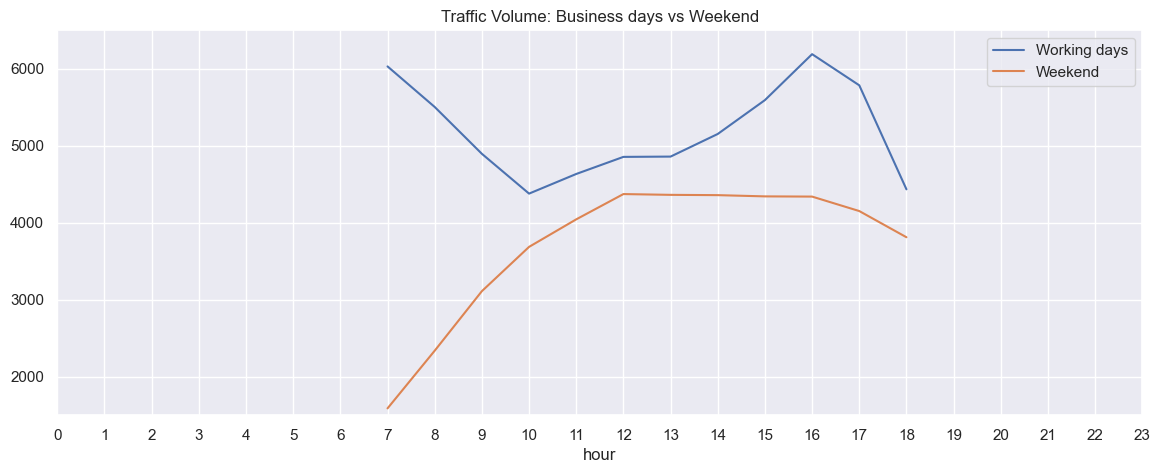

In [25]:
plt.figure(figsize=(14,5))

plt.xlim(6,20)
plt.ylim(1500,6500)
plt.xticks(range(0,24))
plt.title('Traffic Volume: Business days vs Weekend')

by_hour_business['traffic_volume'].plot.line()
by_hour_weekend['traffic_volume'].plot.line()

plt.legend(["Working days","Weekend"], loc="upper right")
plt.show()

- Mean of traffic volume in working days is higher than weekend.
- Traffic volume in working days with peak at 7am and 16pm.
- Traffic volume in weekend with increase since 7am to 12pm, and begin to decrease at 16pm.

### 8. Weather Indicators
1. Find the correlation values between `traffic_volume` and the numerical weather columns.
2. Find the weather column with the strongest correlation with `traffic_volume` and plot a scatter plot for this weather column and `traffic_volume`.
3. Do any of these weather columns seem like reliable indicators for heavy traffic?

In [30]:
daytime.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Temperature')

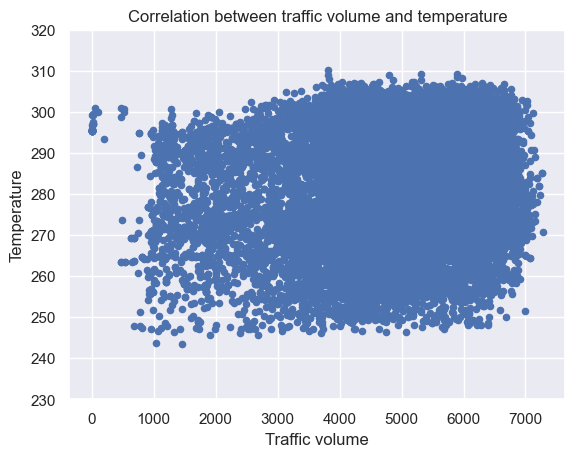

In [32]:
daytime.plot.scatter('traffic_volume','temp')
plt.ylim(230,320)
plt.title("Correlation between traffic volume and temperature")
plt.xlabel('Traffic volume')
plt.ylabel('Temperature')

- It appears there is no strong correlation between temperature and traffic volume

### 9. Weather Types
1. Plot a horizontal bar plot for the `traffic_volume` column of `by_weather_main`.
2. Analyze the bar plot. Is there any traffic volume exceeding 5,000 cars? Can you find any weather type as a heavy traffic indicator?
3. Plot a horizontal bar plot for the `traffic_volume` column of `by_weather_description`. This column has many unique values, so you'll need to enlarge the figure size to make it readable. You can use `plt.figure(figsize=(width,height))` or `Series.plot.barh(figsize=(width,height))`.
4. Analyze the bar plot. Is there any traffic volume exceeding 5,000 cars? Can you find any weather type as a heavy traffic indicator?
5. Write up your conclusions for the entire project — this was the last step.

In [47]:
by_weather_main=daytime.groupby('weather_main').mean()
by_weather_main.corr()['traffic_volume']

temp              0.012038
rain_1h           0.162631
snow_1h          -0.468517
clouds_all       -0.224766
traffic_volume    1.000000
dayofweek         0.768252
hour              0.012210
Name: traffic_volume, dtype: float64

Text(0, 0.5, 'Weather main')

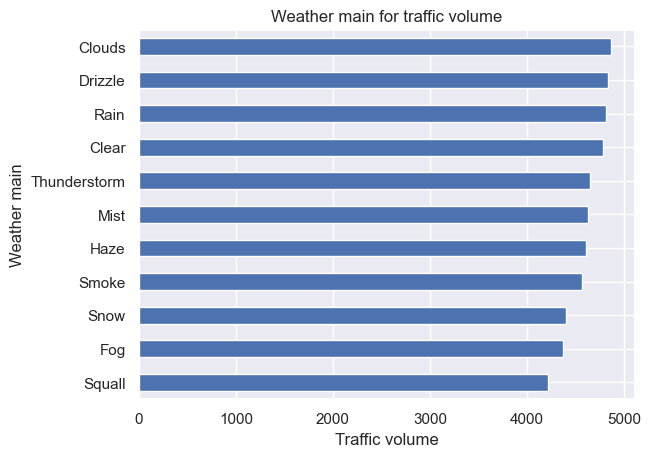

In [44]:
by_weather_main['traffic_volume'].sort_values().plot.barh()
plt.xlabel('Traffic volume')
plt.title('Weather main for traffic volume')
plt.ylabel('Weather main')

- No, weather is not a indicator to heavy traffic

In [45]:
by_weather_description=daytime.groupby('weather_description').mean()

Text(0, 0.5, 'Weather description')

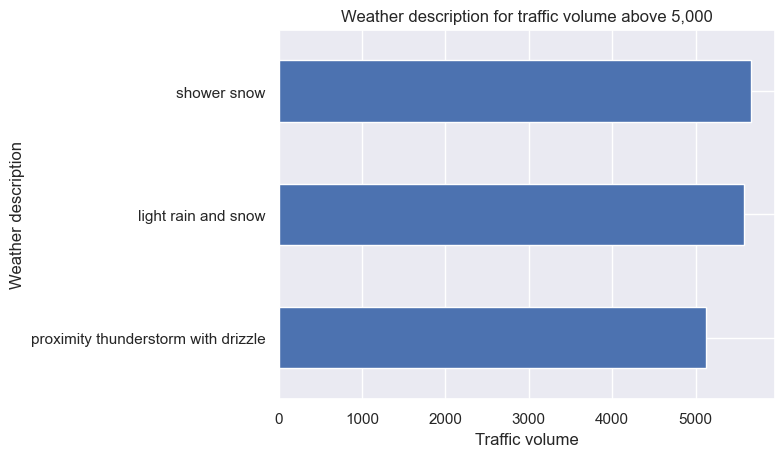

In [42]:
#plt.figure(figsize=(14,30))
by_weather_description[by_weather_description['traffic_volume']>5000]['traffic_volume'].sort_values().plot.barh()
plt.xlabel('Traffic volume')
plt.title('Weather description for traffic volume above 5,000')
plt.ylabel('Weather description')

Obiviously, `shower snow`,`light rain and snow` and `proximity thunderstorm with drizzle` are potiential indicators of heavy traffic with each of them has traffic volume exceeding 5,000.

### Summary

The objective of this project is to find possible indicators of heavy traffic on the I-94 interstate highway. The results of the analysis shows that daytime indicators are more significant than nighttime and weather indicators. The analysis revealed the following as some of the major indicators for heavy traffic.
- Traffic is usually  heavier during the `warm months (March -  October)` and less heavy in the `cold months (November - February)`
-  Generall, the traffic volume is usually higher during the working days, compare to weekends. The rush hours for heavy traffic are `6am-7am` and `3pm-4pm` on daytime with records of over 6000 cars.
- `Shower snow`, `light rain and snow` and `proximity thunderstorm with drizzle` also affect traffic volume in dayattime with with over 5000 traffic volume
- `Proximity shower rain` and `light intensity shower rain` have little effect on traffic volume in nightime with about 3000 cars compare to other weather factors in the nighttime
- No strong correlation between temperature and traffic volume as the correlation coeficient is less thean 1.
